<a href="https://colab.research.google.com/github/zanemroue/Microeconomics/blob/main/Comparing_Right_to_Counsel_and_Housing_Subsidy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing The Effectiveness of The Right to Counsel and a Housing Subsidy on Housing Stability

The Right to Counsel is a policy that gives low-income households access to free legal representation during eviction proceedings. This helps to protect these households from losing their housing and increases their housing stability. On the other hand, housing subsidies, such as vouchers, provide financial assistance to low-income households to help them afford housing. Both of these policy initiatives can effectively increase housing stability for low-income households. However, the Right to Counsel may be more efficient for several reasons. 
- It is more targeted in its focus, as it specifically addresses the issue of eviction. 
- It may be more cost effective for the government, as providing legal representation may be less expensive than financial assistance on houses. 
- The Right to Counsel may have a better outcome rate, as it can help low-income households successfully defend against eviction and maintain their housing.

Since both of these methods are publically funded, we will study the government's problem to model why The Right to Council is more efficient than a housing subsidy.


Important Assumptions Made: 
1. The studied group are all low income individuals in the same group **(Given)**
2. All houses cost the same **(Limiting)**
3. Cost of legal representation is the same **(Relatively True)**
4. Short term impact **(Limiting)**

The **limiting** assumptions will be addressed.

In [ ]:
%%capture 
!pip install jaxopt
import jax 
from mpl_toolkits.mplot3d import Axes3D
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp 
import jaxopt
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial 
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

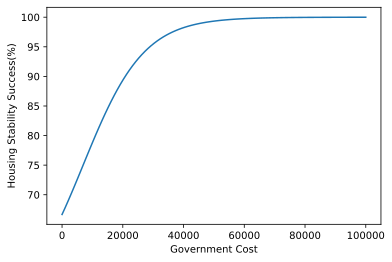

In [ ]:
def housing_stability(cost):
    # Normalize the cost to be between 0 and 1
    normalized_cost = cost / 100000
    stability = 1 / (1 + jax.nn.sigmoid(-10 * normalized_cost))
    
    return stability

costs = jnp.linspace(0, 100000, 100)

# Evaluate the function at each cost in the range
stabilities = housing_stability(costs)

# Convert the stabilities to percentages
stabilities = stabilities * 100

plt.plot(costs, stabilities)
plt.xlabel('Government Cost')
plt.ylabel('Housing Stability Success(%)')
plt.show()


The primary objective function of the government, in this case, is to maximize housing stability for low-income households while minimizing the cost to the government.

The cost to the government of implementing the Right to Counsel includes the expenses associated with providing legal counsel, like attorney fees and legal costs. The cost of the housing subsidy to the government is the cost of the subsidy itself.

To determine the most efficient policy, the government can measure the trade-off between cost and efficiency of the method. The graph above shows the housing stability rate as a function of Government cost.

In [ ]:

def LC_probability(cost):
    # Normalize the cost to be between 0 and 1
    normalized_cost = cost / 100000
    probability = 1 / (1 + jnp.exp(-10 * normalized_cost))#sigmoid function
    
    return probability

def HS_probability(cost):
    # Normalize the cost to be between 0 and 1
    normalized_cost = cost / 100000
    probability =  1 / (1 + jnp.exp(-5 * normalized_cost))#sigmoid function
    
    return probability

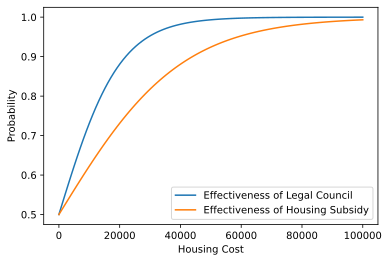

In [ ]:
costs = jnp.linspace(0, 100000, 100)

probabilities_1 = LC_probability(costs)
probabilities_2 = HS_probability(costs)

plt.plot(costs, probabilities_1, label='Effectiveness of Legal Council')
plt.plot(costs, probabilities_2, label='Effectiveness of Housing Subsidy')
plt.xlabel('Housing Cost')
plt.ylabel('Probability')
plt.legend()
plt.show()

It is also essential to consider the relative costs of the two options. For example, providing legal representation through the Right to Counsel is generally cheaper than providing financial assistance through subsidies.

As seen in the above graphs: To compare the relative effectiveness of the two policy options, we can define two probability functions, one for the Right to Counsel and one for housing subsidies. The probability function for the Right to Counsel represents the likelihood that a low-income household will successfully defend against eviction and maintain their housing with the help of legal representation. The probability function for housing subsidies represents the likelihood that a low-income household will maintain their housing with the help of financial assistance.

The probability of The Right to Counsel succeeding is generally greater at every cost level compared to the probability of housing subsidies succeeding. However, as expected, as the cost to the government increases, the two effectiveness probabilities converge. This is because higher subsidies may be more effective in the long run. This will be described further in the limitations of this model.

In [ ]:
def effectiveness(cost, cost_to_government):
    normalized_cost = cost / 100000
    
    # Use the probability functions to calculate the probability of success at this cost
    probability_1 = HS_probability(cost)
    probability_2 = LC_probability(cost)
    
    # Calculate the effectiveness as the difference between the probabilities, multiplied by the cost to the government
    effectiveness = (probability_1 - probability_2) * cost_to_government
    
    return effectiveness

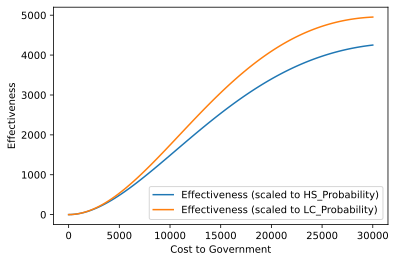

In [ ]:
costs_to_government = jnp.linspace(0, 30000, 100)

# Calculate the effectiveness for each cost to the government, scaled to each probability function
effectiveness_1 = []
effectiveness_2 = []
for cost_to_government in costs_to_government:
  
    probability_1 = LC_probability(cost_to_government)
    probability_2 = HS_probability(cost_to_government)
    
    # Calculate the effectiveness as the difference between the probabilities, multiplied by the cost to the government
    effectiveness_1.append((probability_1 - probability_2) * cost_to_government / probability_1)
    effectiveness_2.append((probability_1 - probability_2) * cost_to_government / probability_2)

plt.plot(costs_to_government, effectiveness_1, label='Effectiveness (scaled to HS_Probability)')
plt.plot(costs_to_government, effectiveness_2, label='Effectiveness (scaled to LC_Probability)')
plt.xlabel('Cost to Government')
plt.ylabel('Effectiveness')
plt.legend()
plt.show()


The effectiveness is calculated as the difference between the probabilities of the two policy options, multiplied by the cost to the government and scaled to the probability function of one of the policy options.

Based on the plot above, it may be evident that the Right to Counsel is more effective at lower costs than providing a housing subsidy. This means that the Right to Counsel is generally more cost-effective than housing subsidies for a given level of effectiveness in increasing housing stability. However, as the cost of the Right to Counsel increases, the effectiveness of the policy may converge with the effectiveness of housing subsidies, indicating that the two policy options may have similar levels of efficiency at higher cost levels.

# **Correcting for assumptions**

To analyze the relative efficiency of the Right to Counsel and housing subsidies in increasing housing stability for low-income households, we assumed that the cost to the government of implementing these policies would remain constant. However, this assumption may not always hold true in practice.

For the Right to Counsel, the cost of legal representation for a given eviction case may be relatively constant. However, for housing subsidies, the cost to the government may vary depending on the price of the housing being subsidized. Houses can vary significantly in terms of cost, and a defined subsidy may be more or less effective in helping a low-income household afford a given house. For example, a defined subsidy may be sufficient to cover the rent on a cheaper house but may not be sufficient to cover the rent on a more expensive house. As a result, the cost to the government of implementing a housing subsidy may vary depending on the price of the housing being subsidized.

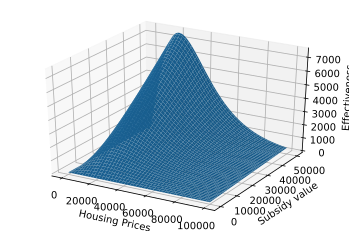

In [ ]:
def effectiveness(cost, cost_to_government):
    normalized_cost = cost / 100000
    probability_1 = LC_probability(cost)
    probability_2 = HS_probability(cost)
    effectiveness = (probability_1 - probability_2) * cost_to_government #Substracting probabilities just for the effect
    
    return effectiveness

costs = jnp.linspace(0, 100000, 100)

costs_to_government = jnp.linspace(0, 50000, 100)

costs_grid, costs_to_government_grid = jnp.meshgrid(costs, costs_to_government)

effectiveness_grid = effectiveness(costs_grid, costs_to_government_grid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(costs_grid, costs_to_government_grid, effectiveness_grid)
ax.set_xlabel('Housing Prices')
ax.set_ylabel('Subsidy value')
ax.set_zlabel('Effectiveness')
plt.show()

To correct for the varrying housing costs, we can make a 3D plot that relates the housing price, subsidy value, and effectiveness of the subsidy. As seen in the graph, a defined subsidy range is only effective for a certain set range of house prices. This effectiveness at the set subsidy range only decreases as the housing price increases. This provides further evidence of how The Right to Council may be more targetted and efficient to all different neighborhoods than providing a defined subsidy. 

# **Limitations and Extensions**

One limitation of comparing the Right to Counsel and housing subsidies as policy options for increasing housing stability is that they may have different short-term and long-term effects. For example, the Right to Counsel targets low-income households facing eviction and can provide short-term stability by helping these households defend against eviction. However, it does not address the underlying reasons for housing instability, and the landlords may attempt to evict the households again in the future. In contrast, housing subsidies, such as vouchers, can help low-income households afford a house and maintain this housing over a more extended period.

To further improve the analysis of these policy options, it would be helpful to calculate the long-term costs of each policy. This would allow for a more comprehensive comparison of the two options based on the government's short-term or long-term housing stability goal. By generating two different scenarios based on these different time horizons, it would be possible to understand better the relative efficiency of the Right to Counsel and housing subsidies in achieving the government's goal of increasing housing stability for low-income households.